<a href="https://colab.research.google.com/github/maitri-cpu/internship-Studio_Project/blob/master/Marketing%20Campaign%20for%20Banking%20Products%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Maitri Dhorajiya**   

E-Mail ID: **maitri.dhorajiya@gmail.com**

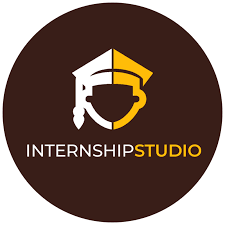

# Project Title:**Marketing Campaign for Banking Products**
**Description Of Project:**  Data Of 5000 Cutomers are given.You Have to complete the Given Task Step by step.Main Objective is only 480(=9.6%) accepted the personal loan that was offered to them in the earlier compaign.

**Objective::** The Classification Goal is to Predict the likelihood of a liability customer buying personal loans.



> Import of DataSets & Libraries



In [ ]:
#Import Of Library That are used in the project
import io
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split          
%matplotlib inline
#Import of Datasets
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv




> **Read the dataset Values**



In [ ]:
#read dataset Values
dataset=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
#1st Five Value Of the Data
dataset.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#last Five value of the Data
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1




> Show the Information Of dataset Like **DataType,Memmory-Usage,Non-Null Count etc.**




In [ ]:
# Check the datatype,Nullcount and Duplicate data availabel in the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


>**Check For Duplicate Data**

In [ ]:
print("Is there is any duplicated Data in Datasets",sum(dataset.duplicated()))#If Zeo that means no duplicated Data in given Dataset

Is there is any duplicated Data in Datasets 0



> **Statistical Summary**


In [ ]:
#Statistical Summmary of given Dataset
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


>**Shape**


In [ ]:
#Shape of the given dataset
print("shape::",dataset.shape)

shape:: (5000, 14)


>**Null Values**

In [ ]:
#Is Dataset is NULL or Not CHECK::
print("Check For Null")
dataset.isnull().sum()#if all column sum is equal to zeo that means there is no null values

Check For Null


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

>**Total Columns**

In [ ]:
#Total Columns in dataset
print("Available Columns In Dataset",dataset.columns)

Available Columns In Dataset Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


>**Binary Categories Online,Personal Loan(Target Variable),Securities Account,CD Account,CreditCard**

In [ ]:
#Binary Count
#Online~~Customers are Using the Online Banking Service Or Not
print(dataset['Online'].value_counts(dropna = False))
#Personal-Loan~~the Customer accept the personal_Loan Offer
##@target_variable
print(dataset['Personal Loan'].value_counts(dropna = False))
#Securities-Account~~the Customer Have a Securities Account With a Bank
print(dataset['Securities Account'].value_counts(dropna = False))
#CD Account~~the customer have a certificate of deposit (CD) account with the bank
print(dataset['CD Account'].value_counts(dropna = False))
#Credit Card~~the customer use a credit card issued by Bank
print(dataset['CreditCard'].value_counts(dropna = False))

1    2984
0    2016
Name: Online, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64




> **Interval categories~~Experience,Age,Income,CC avg and mortgage**



In [ ]:
#Experience~~ Negative Values
print(dataset.loc[dataset.Experience < 0].head(10))
print(len(dataset[dataset.Experience < 0]))#Total Number Of Negative Values

      ID  Age  Experience  ...  CD Account  Online  CreditCard
89    90   25          -1  ...           0       0           1
226  227   24          -1  ...           0       0           0
315  316   24          -2  ...           0       1           0
451  452   28          -2  ...           0       1           0
524  525   24          -1  ...           0       1           0
536  537   25          -1  ...           0       1           0
540  541   25          -1  ...           0       1           0
576  577   25          -1  ...           0       0           1
583  584   24          -1  ...           0       1           0
597  598   24          -2  ...           0       0           1

[10 rows x 14 columns]
52


>**Univariate Analysis**






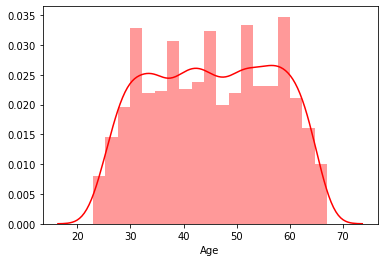

In [ ]:
sns.distplot(dataset.Age,color='R')

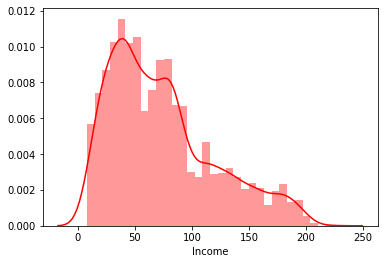

In [ ]:
sns.distplot(dataset.Income,color='R')

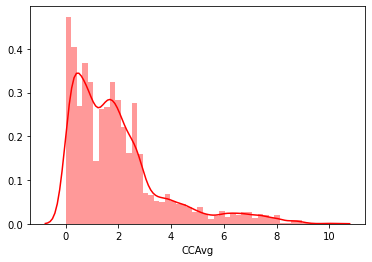

In [ ]:
sns.distplot(dataset.CCAvg,color='R')

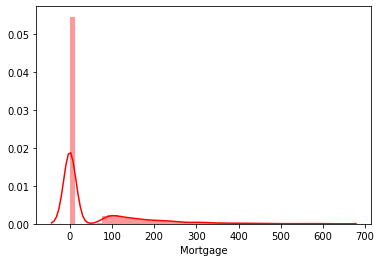

In [ ]:
sns.distplot(dataset.Mortgage,color='R')

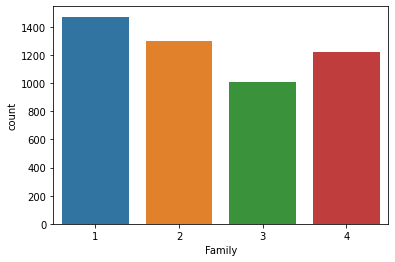

In [ ]:
sns.countplot(dataset.Family)

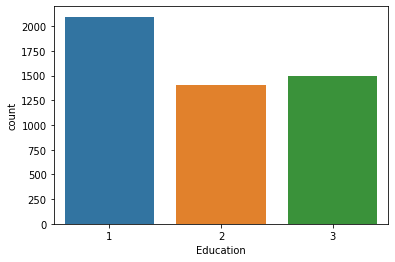

In [ ]:
sns.countplot(dataset.Education)

>**Multivariate Analysis**

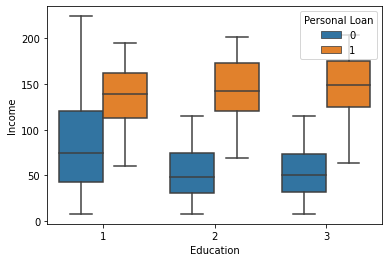

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

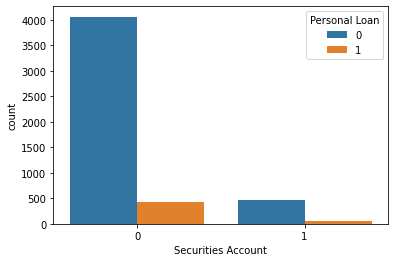

In [ ]:
sns.countplot(x="Securities Account", data=dataset,hue="Personal Loan")

In [ ]:
#Original Category~~Education~~Family
print(dataset['Family'].value_counts())
print(dataset['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


>**visualizing two classes in the target variable**

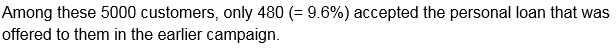

0    4520
1     480
Name: Personal Loan, dtype: int64


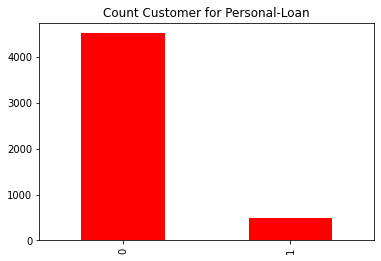

In [ ]:
print(dataset['Personal Loan'].value_counts(dropna = False))
count = dataset["Personal Loan"].value_counts()
#Zero means not interested Customer and 1 means Interested Customer(Accpted personal Loan)
count.plot(kind = "bar", title = "Count Customer for Personal-Loan",color='R')

>**Deal With Negative Values**

In [ ]:
#Replace with the median experience from people having the same age
dataset_Age = dataset[dataset.Experience >= 0].groupby('Age').Experience.median().to_frame('Experience Median').reindex()
dataset = pd.merge(dataset, dataset_Age, on = "Age", how = "left")
#value can be a floating point number
#~~Round up the value to integer
dataset.loc[dataset.Experience < 0, 'Experience'] = np.round(dataset['Experience Median'])
#Here 23 year old==null
#~~No Accurate data,replace the null data of Experience with 0
dataset.loc[dataset.Experience.isnull(),'Experience'] = 0

In [ ]:
dataset.Experience.isnull().sum()

0



> **Correlation between Age and Experience and clean the data(Experience Median,ID,ZIP Code) that are not needed**



In [ ]:
dataset.drop(['ID', 'Experience Median', 'ZIP Code','Experience'],  inplace=True, axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


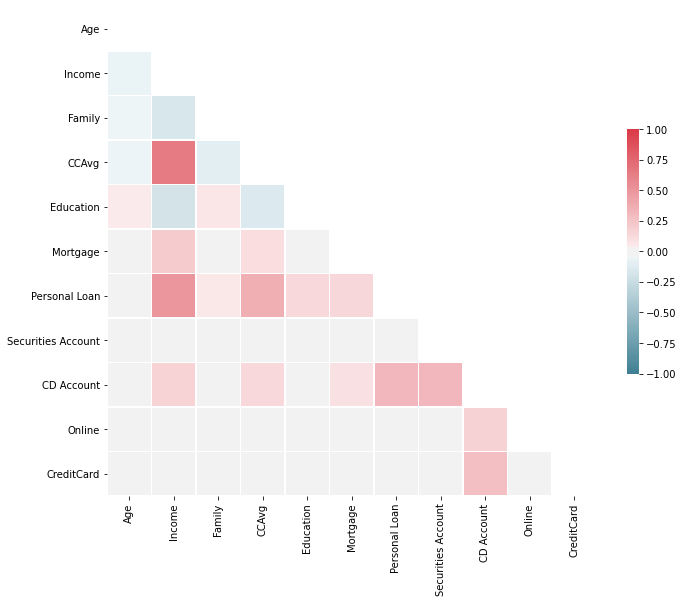

In [ ]:
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

>**Number Of Unique in each Column**

In [ ]:
dataset.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

>**Number of people with zero mortgage**

In [ ]:
(dataset.Mortgage==0).sum()

3462

>**Number of people with zero credit card spending per month**

In [ ]:
(dataset.CCAvg==0).sum()

106

In [ ]:
dataset.corr()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


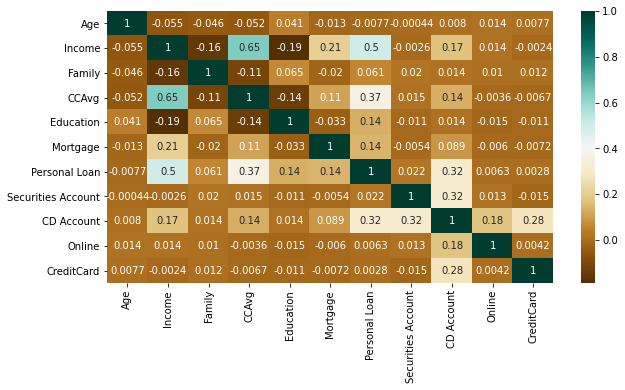

In [ ]:
plt.figure(figsize=(10,5))
cr = dataset.corr()
sns.heatmap(cr,cmap = "BrBG",annot = True)

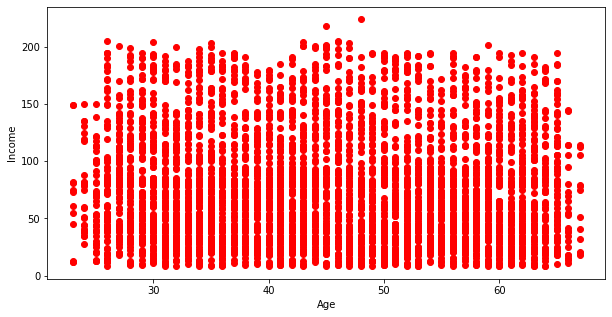

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(dataset['Age'],dataset['Income'],color='R')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

Text(0.5, 0, 'Age')

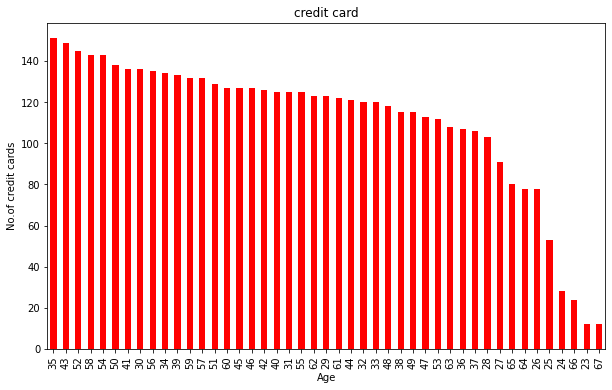

In [ ]:
dataset['Age'].value_counts().plot.bar(figsize = (10,6),color='R')
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

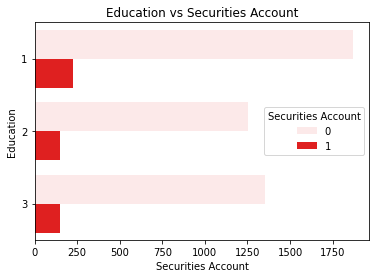

In [ ]:
sns.countplot(y='Education', data = dataset , hue = 'Securities Account',color='R')
plt.title('Education vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

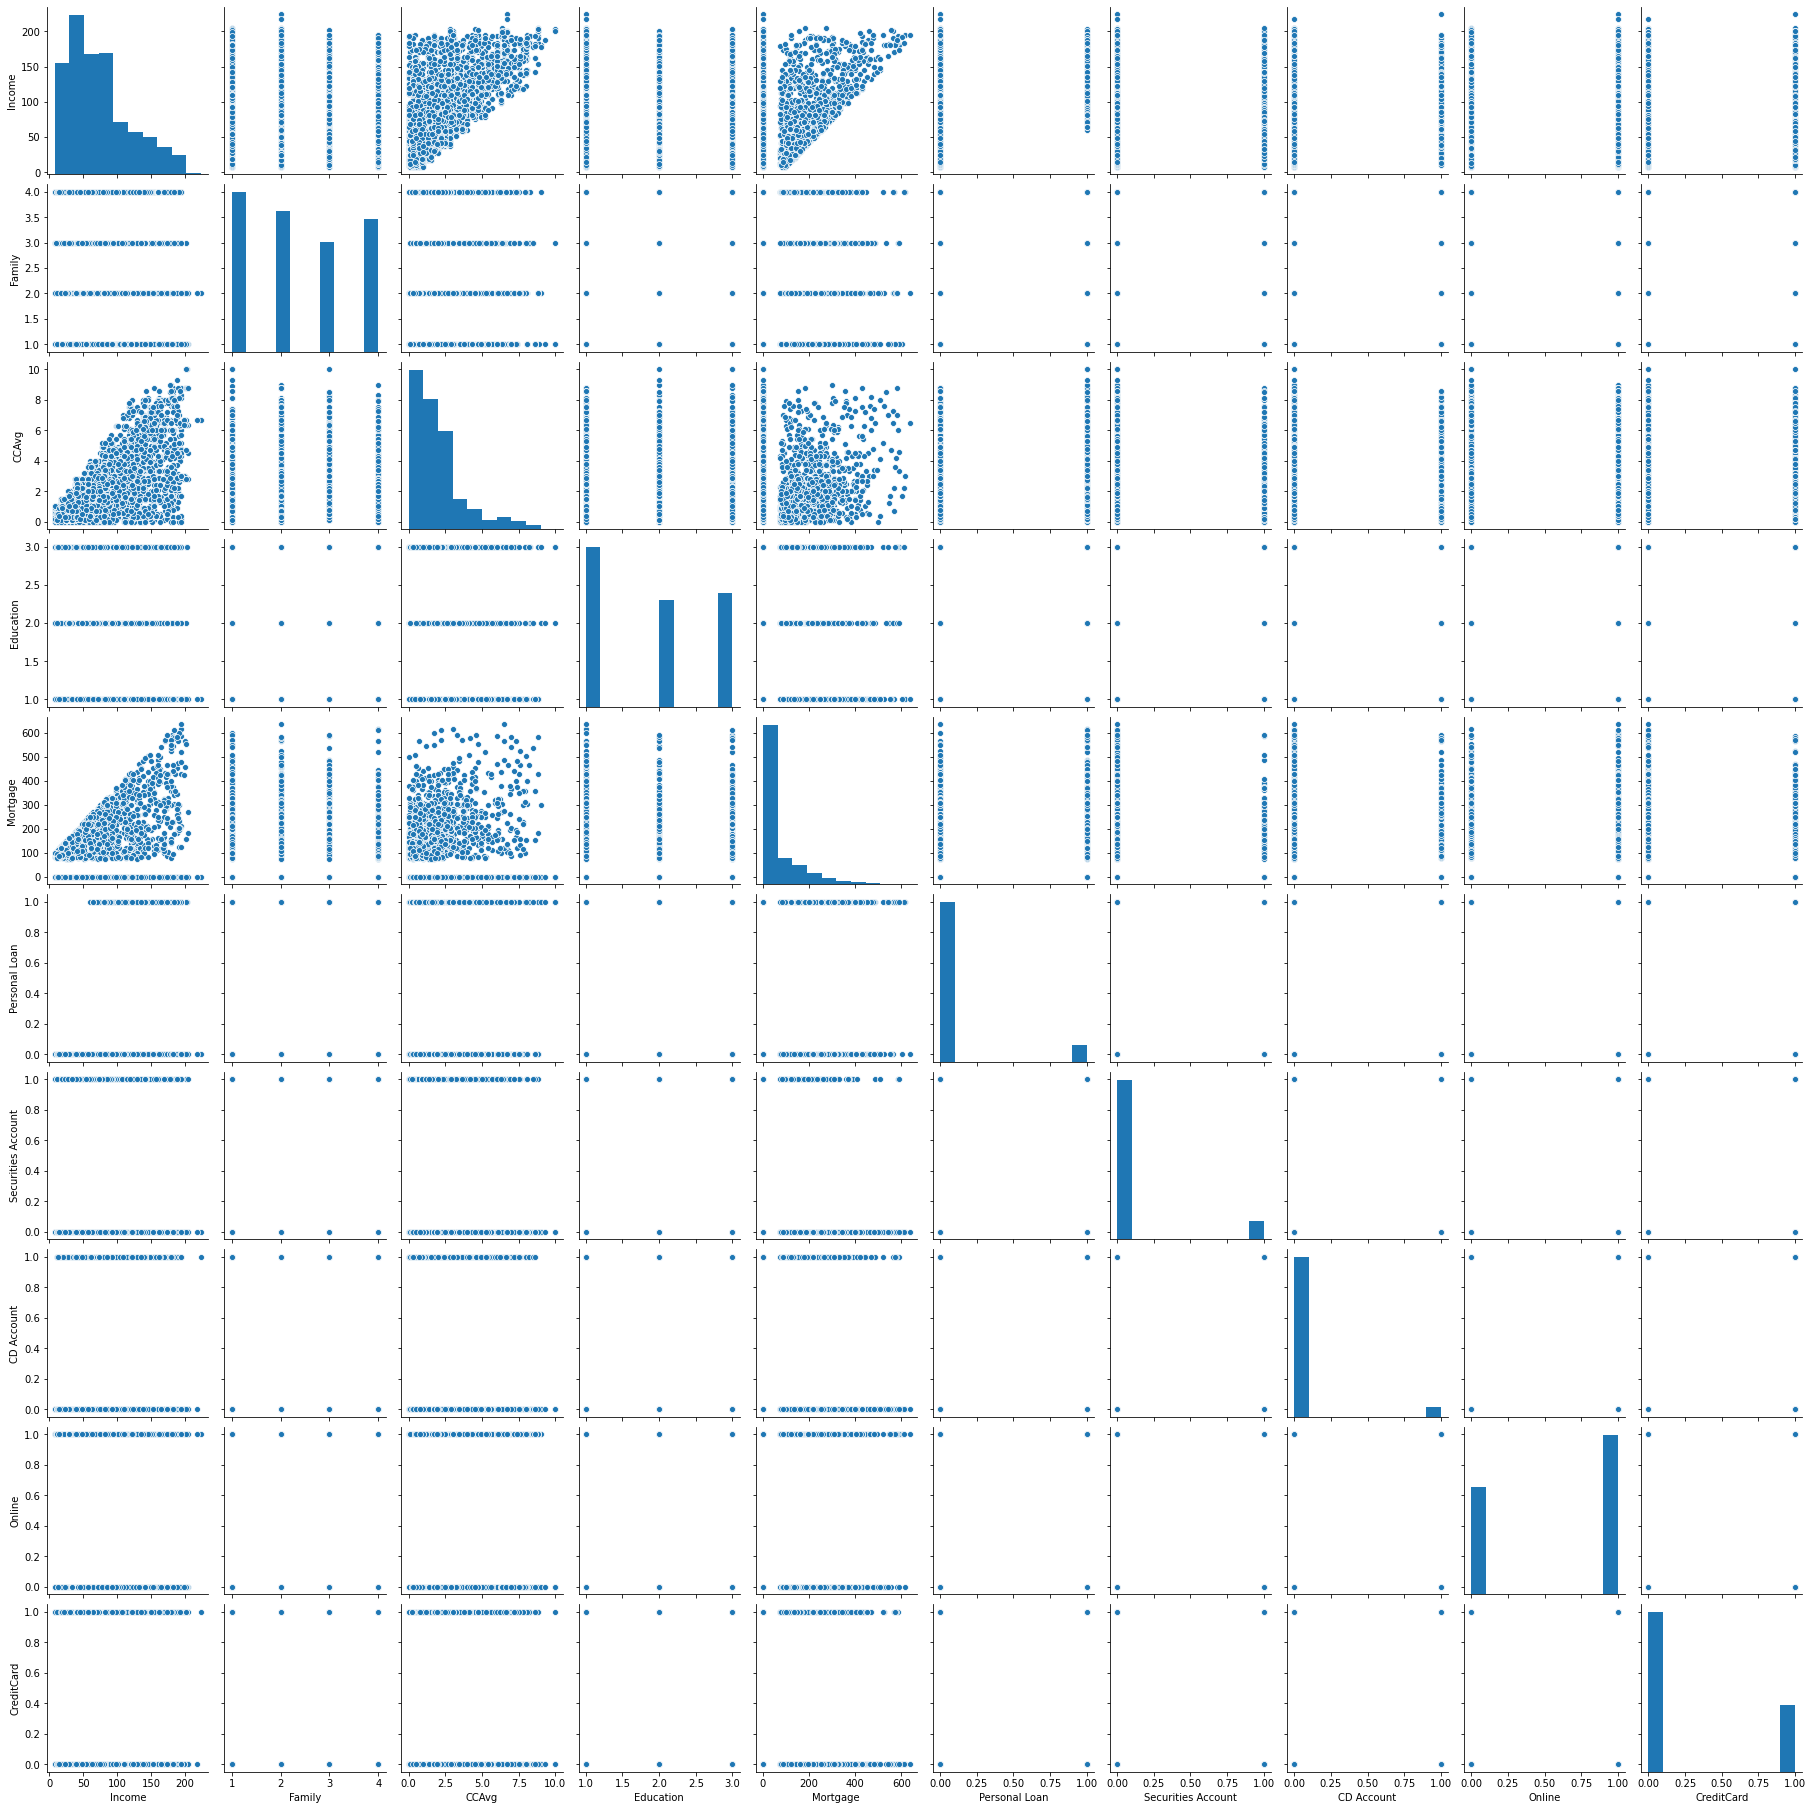

In [ ]:
sns.pairplot(dataset.iloc[:,1:])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 628.8 KB


>**Transformation of feature variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
    
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1




> **Categorized Categorical Values**



In [ ]:
# Education, Family
dataset['Education'] = dataset['Education'].astype('category')
dataset['Family'] = dataset['Family'].astype('category')


In [ ]:
X = dataset.drop(['Personal Loan'], axis=1)
y = dataset['Personal Loan'].values

X.shape, y.shape

((5000, 10), (5000,))

>**Split the data into Training Dataset And Test Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [ ]:
class_names = ['cant take loan','take loan']

>**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

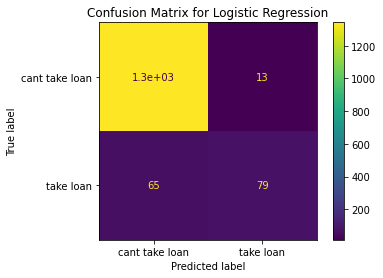

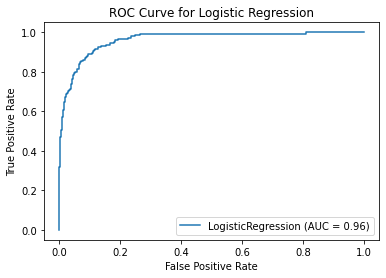

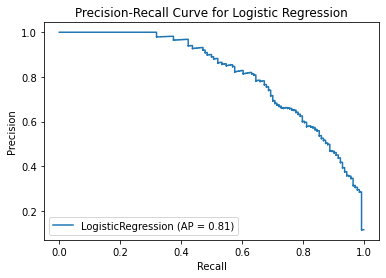

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

>**RANDOM FOREST CLASSIFIER**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.96
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

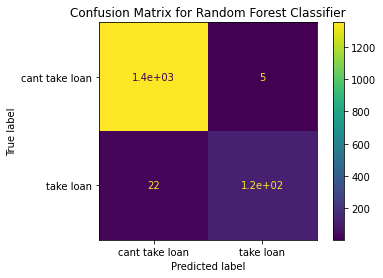

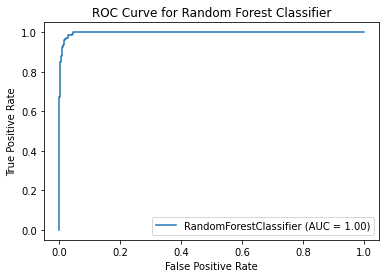

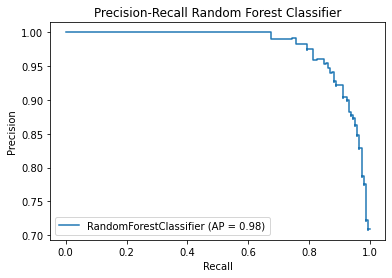

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

# Completed